In [1]:
from scipy.stats import norm 
import numpy as np

In [2]:
mean_s = 84.3
std_s = 12/np.sqrt(15)

In [3]:
rv=norm()
rv.isf(0.005)

2.575829303548901

In [4]:
lowerbound = mean_s - rv.isf(0.005)*std_s
upperbound = mean_s + rv.isf(0.005)*std_s
print(lowerbound, upperbound)

76.31908480374564 92.28091519625436


In [5]:
from scipy import stats

In [6]:
samples = [1.11, 1.07, 1.11, 1.07, 1.12, 1.08, 1.08, 1.18, 1.18, 1.18, 1.12]
stats.ttest_1samp(samples, popmean=1, alternative="greater")

Ttest_1sampResult(statistic=8.953813600283121, pvalue=2.166934837557583e-06)

In [7]:
#세타1 =/= 세타2
from scipy import stats
control= [320,430,530,360,280,420,370,380,470,430]
treat = [260,750,430,790,470,860,490,620,520,460]
tstat, pval = stats.ttest_ind(control, treat, equal_var=False)
print("t-stat:%.3f p-value:%.3f" % (tstat, pval))

t-stat:-2.619 p-value:0.023


In [8]:
#세타1 == 세타2
from scipy import stats
control= [320,430,530,360,280,420,370,380,470,430]
treat = [260,750,430,790,470,860,490,620,520,460]
tstat, pval = stats.ttest_ind(control, treat, equal_var=True)
print("t-stat:%.3f p-value:%.3f" % (tstat, pval))

t-stat:-2.619 p-value:0.017


In [9]:
from scipy import stats
caffeine = [4.52, 5.69, 4.70, 3.81, 4.06, 3.22, 2.96, 3.53]
placebo = [6.37, 5.44, 5.58, 5.27, 5.11, 4.89, 4.70, 3.20]
tstat, pval = stats.ttest_ind(caffeine, placebo, equal_var=True)
print("t-stat:%.3f p-value:%.3f" % (tstat, pval))

t-stat:-2.242 p-value:0.042


In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

data=pd.read_csv("student-mat.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


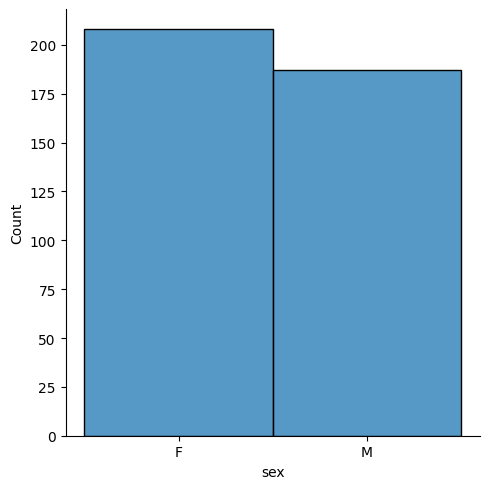

In [11]:
sns.displot(data["sex"])

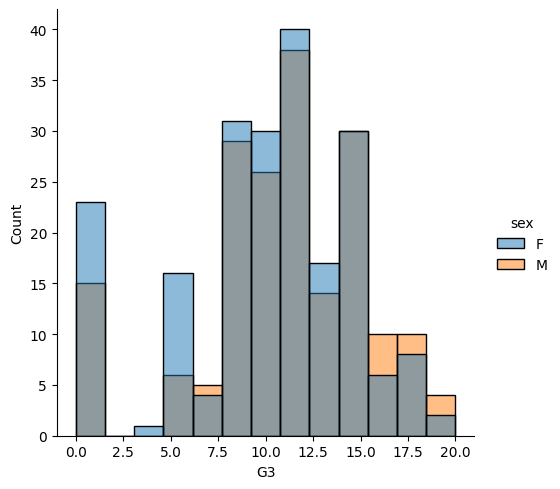

In [12]:
sns.displot(data, x="G3", hue="sex")

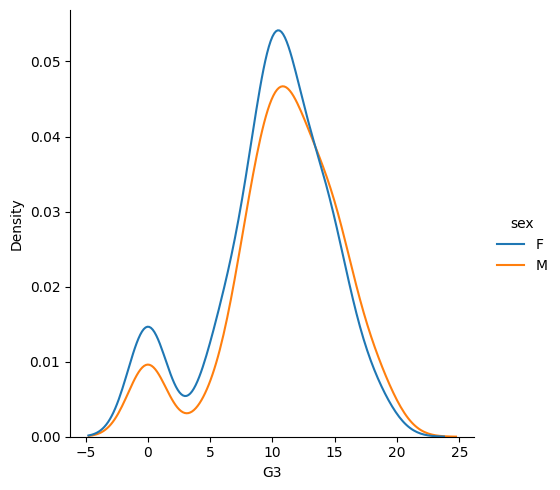

In [13]:
sns.displot(data, x="G3", hue="sex",kind="kde")

<AxesSubplot: xlabel='sex', ylabel='G3'>

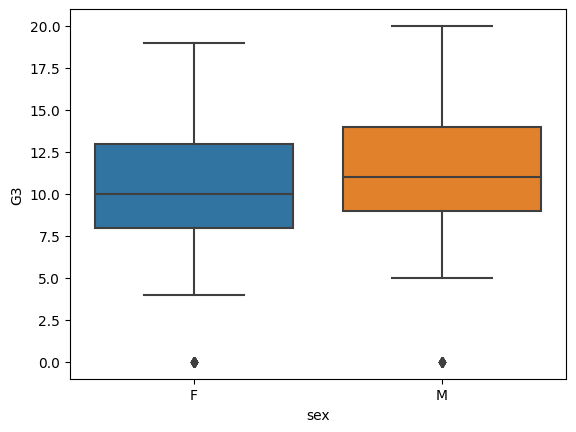

In [14]:
sns.boxplot(data=data, x="sex", y="G3")

In [15]:
data_m=data[data['sex'] == 'M']
data_w=data[data['sex'] == 'F']
print(data_m["G3"].mean())
print(data_w["G3"].mean())
print(data_m[data_m["G3"]>0]["G3"].mean())
print(data_w[data_w["G3"]>0]["G3"].mean())

10.914438502673796
9.966346153846153
11.866279069767442
11.205405405405406


In [16]:
from scipy.stats import bartlett
stat, p =bartlett(data_m[data_m["G3"]>0]["G3"], data_w[data_w["G3"]>0]["G3"])
print(stat,p)

0.1214772696636538 0.7274377618424044


In [17]:
stats.ttest_ind(data_m[data_m["G3"]>0]["G3"], data_w["G3"],equal_var=True)

Ttest_indResult(statistic=4.537760774784488, pvalue=7.649188699543501e-06)

(array([417., 415., 121.,  38.,   6.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.59044299,  2.49880535,  4.40716771,  6.31553007,  8.22389243,
        10.13225479, 12.04061715, 13.94897951, 15.85734187, 17.76570423,
        19.6740666 ]),
 <BarContainer object of 10 artists>)

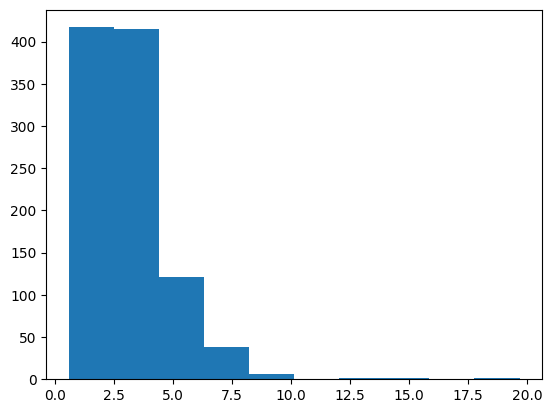

In [18]:
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

np.random.seed(1)

lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

plt.hist(lognorm_dataset)

In [19]:
from scipy import stats
samples = [1.11, 1.07, 1.11, 1.07, 1.12, 1.08, 1.08, 1.18, 1.18, 1.18, 1.12]
stats.ttest_1samp(samples, popmean=1, alternative="greater")

Ttest_1sampResult(statistic=8.953813600283121, pvalue=2.166934837557583e-06)

In [20]:
import scipy
print (scipy.__version__)

1.9.3


PearsonRResult(statistic=0.9792796868185203, pvalue=5.802420433095063e-21)


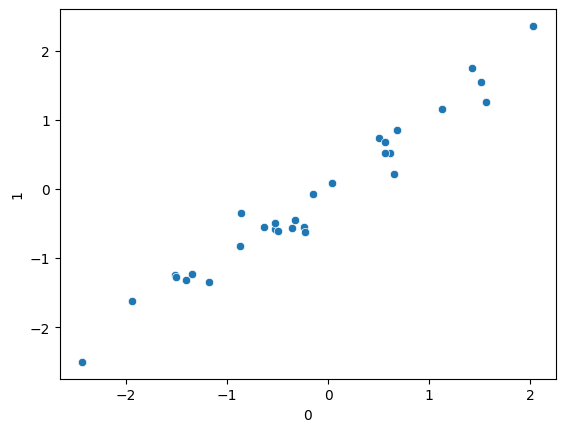

In [21]:
from scipy import stats
import pandas as pd
import seaborn as sns
x=stats.norm.rvs(size=30)
e=stats.norm.rvs(scale=0.2, size=30)
y=x+e
df=pd.DataFrame([x,y]).T
sns.scatterplot(data=df, x=0, y=1)
print(stats.pearsonr(x,y))

PearsonRResult(statistic=0.9792796868185203, pvalue=5.802420433095063e-21)
SpearmanrResult(correlation=0.9448275862068966, pvalue=4.225233849011341e-15)


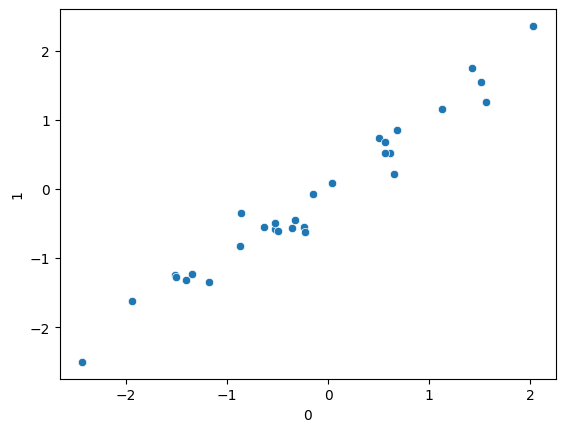

In [22]:
sns.scatterplot(data=df, x=0, y=1)
print(stats.pearsonr(x,y))
print(stats.spearmanr(x,y))

In [23]:
#chi-square test 
from scipy.stats import chisquare
observed_dice=[53222.52118,52465,52338,52244,532085]
chi_value, p_value = chisquare(observed_dice)
print("chi_val%.2f pvalue %.7f" %(chi_value, p_value))

observed_line=[97, 184, 93]
expected_line=[0.25*374, 0.5*374, 0.25*374]
chi_value, p_value = chisquare(observed_line, expected_line)
print("chi_val%.2f pvalue %.7f" %(chi_value, p_value))

chi_val1238965.41 pvalue 0.0000000
chi_val0.18 pvalue 0.9131007


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
df_ameshousing=pd.read_csv("AmesHousing.csv")
df_ameshousing

sm.qqplot(df_ameshousing['SalePrice'],line='s')
plt.show()

ModuleNotFoundError: No module named 'statsmodels'